In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_telco_customer_churn.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,num_services,tenure_category,avg_monthly_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,0-12 months,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,4,13-36 months,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,0-12 months,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,37+ months,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,0-12 months,75.825000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          7043 non-null   object 
 1   gender               7043 non-null   object 
 2   senior_citizen       7043 non-null   int64  
 3   partner              7043 non-null   object 
 4   dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   phone_service        7043 non-null   object 
 7   multiple_lines       7043 non-null   object 
 8   internet_service     7043 non-null   object 
 9   online_security      7043 non-null   object 
 10  online_backup        7043 non-null   object 
 11  device_protection    7043 non-null   object 
 12  tech_support         7043 non-null   object 
 13  streaming_tv         7043 non-null   object 
 14  streaming_movies     7043 non-null   object 
 15  contract             7043 non-null   o

In [7]:
df[['tenure', 'monthly_charges', 'total_charges']].describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [10]:
df['churn'].value_counts(normalize=True) * 100

churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

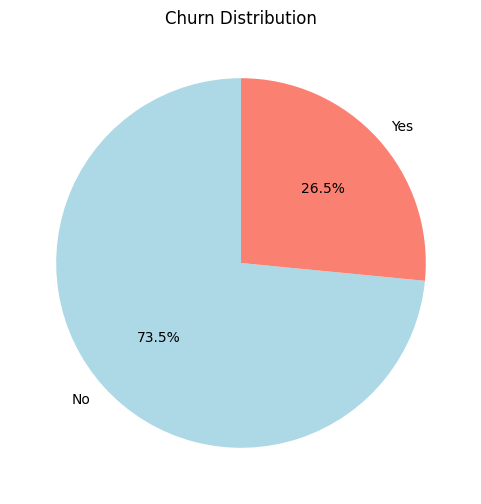

In [11]:
plt.figure(figsize=(6, 6))
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

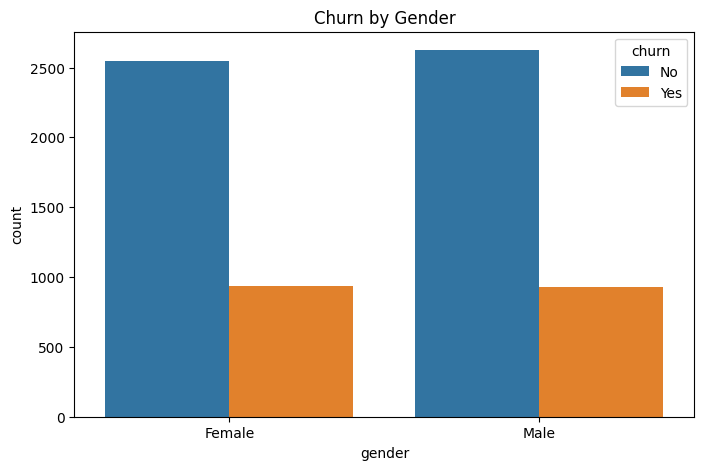

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.show()

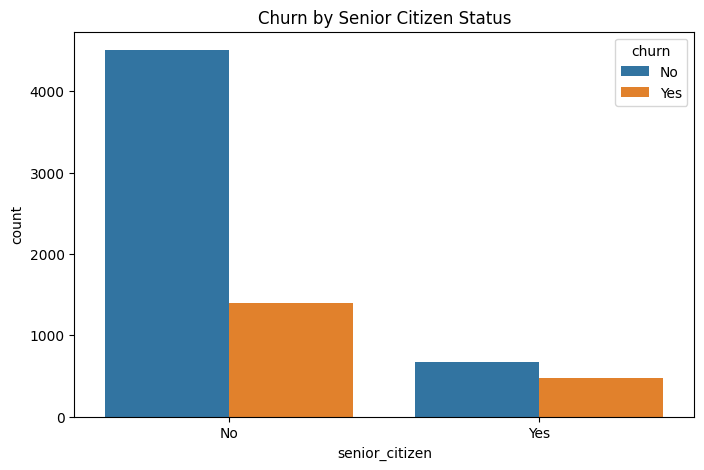

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Churn by Senior Citizen Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

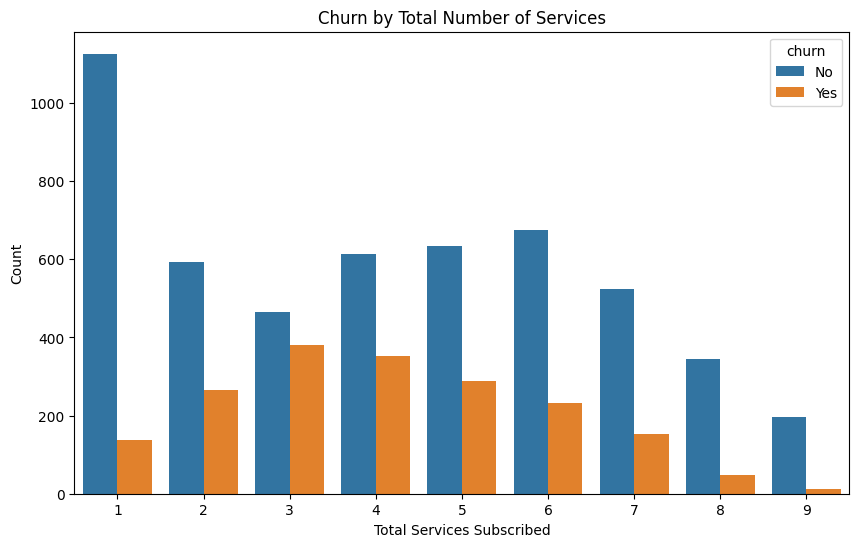

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='num_services', hue='churn')
plt.title('Churn by Total Number of Services')
plt.xlabel('Total Services Subscribed')
plt.ylabel('Count')
plt.show()

In [ ]:
# Cell 6: Univariate analysis - Billing Behavior
# Business insight: Higher charges or certain payment methods might indicate dissatisfaction; e.g., electronic check users churn more—suggest payment incentives.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Monthly Charges distribution
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn')

# Total Charges distribution
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=axes[1])
axes[1].set_title('Total Charges Distribution by Churn')

# Payment Method vs Churn
sns.countplot(data=df, y='PaymentMethod', hue='Churn', ax=axes[2])
axes[2].set_title('Churn by Payment Method')

plt.tight_layout()
plt.show()

In [ ]:
# Cell 7: Bivariate analysis - Tenure and Charges vs Churn
# Business insight: Short-tenure customers with high charges are high-risk; retention offers could target them early.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure by Churn Status')

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status')

plt.tight_layout()
plt.show()

In [ ]:
# Cell 8: Correlation heatmap (numeric features)
# Business insight: Strong correlations (e.g., tenure with total charges) highlight dependencies; weak ones with churn suggest other factors at play.
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numeric_cols + ['Churn']].corr()  # Encode Churn as 0/1 if needed
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Cell 9: Segmentation - High-risk groups
# Business insight: Identify segments (e.g., short tenure + high charges) for targeted retention; estimate potential savings.
# Example: Filter high-risk (tenure < 12 months, MonthlyCharges > 70)
high_risk = df[(df['tenure'] < 12) & (df['MonthlyCharges'] > 70)]
print(f"High-risk customers: {len(high_risk)} ({len(high_risk)/len(df)*100:.2f}% of total)")
print(f"Churn rate in high-risk: {high_risk['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

# Visualize high-risk churn
sns.countplot(data=high_risk, x='Churn')
plt.title('Churn in High-Risk Segment')
plt.show()

In [ ]:
# Cell 10: Business simulation - Rough revenue impact
# Assumption: Average customer value = $500/year (adjust based on data); retention cost = $50/customer.
# Insight: If retaining 50% of high-risk churners saves more than costs, it's worth it.
avg_value = 500  # Placeholder; calculate from data if available
retention_cost = 50
potential_savers = len(high_risk) * (high_risk['Churn'].value_counts(normalize=True)['Yes'])
savings = potential_savers * 0.5 * avg_value  # Assuming 50% retention success
cost = len(high_risk) * retention_cost
net_profit = savings - cost
print(f"Potential Savings: ${savings:.0f}, Cost: ${cost:.0f}, Net Profit: ${net_profit:.0f}")